# 1 Introduction

In the first part of this course we learnt how data sets can be
represented as
[`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).
We know how to load, query and manipulate data from within the Jupyter
Lab environment. In this lab session we will see how we can build
*predictive models* on this data set.

A *predictive model* is used to label previously unseen observations.
There are many situations in which this is useful. Consider fraude
detection for credit card payments. While it is straightforward to
collect factual data related to a transaction such as the time and place
of transaction, amount paid and information about the card holder, it
will initially require human effort to determine if the transaction was
fraudulent. This labelling happens after the fact. Considerable time may
pass before a card holder receives a statement containing the
transaction(s) she did not instantiate and informs the card issuer.

As the number of labelled observations grows, we may attempt to reduce
human involvement by classifying a transaction as its information comes
in. If this can be done quickly and accurately, we could be able to
reject the transaction before it or ask the card holder to authorise the
request via a second factor (such as her mobile banking application).
This process requires a predictive model that learns from the past
(human) decisions and tries to find a relation between the independent
variables (transaction, card and customer information) and a dependent
variable indicating fraudulence.

A suitable model has the following properties

1.  it detects as much fraudulent transaction as possible
2.  it does not erroneously report genuine transactions as fraudulent

**Exercise:** Design, by hand, a model that is guaranteed to report
every fraudulent transaction. You are free to use as much or as little
independent variables. Is this model usable in practice?

There exist many algorithms that describe how predictive models can be
built from data. All outline how on can find an optimal *model* from a
*model family*. They differ in what family, or search space, they
operate on and how that search is conducted. Many algorithms give the
investigator the possibility to alter one or both of these aspects
through *hyperparameters*. This class of algorithms belongs to the
domain of *supervised* learning as they need to be told what to learn in
the form of *labeled data*. The situation can be visualised as:

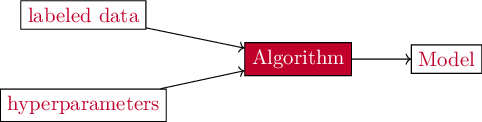

Now an algorithm is *a description of a procedure*. This procedure has
to be implemented in a programming language. While we could do this
ourselves, this is far from trivial. It is better to rely the
implementations found in well-established libraries. In the Python
ecosystem, [scikit-learn](https://scikit-learn.org/) offers
implementations of many algorithms for various tasks related to machine
learning, including

1.  regression,
2.  classification,
3.  model selection,
4.  preprocessing,
5.  clustering,
6.  and dimensionality reduction.

We will be concerned with the first four items on this list. The first
three are the topic of this lab session. A discussion of preprocessing
is postponed to the third and final part of this course. This lab
session is divided into two main sections, one on classification, one on
regression. Model selection plays a pivotal role in machine learning and
is absorbed into those sections.

# 2 Classification

In machine learning, the measurement scale, c.f., Stevens (1946) and the
lecture slides of part 1, of the dependent variable determines the type
of problem. Categorical variables are indicative of classification
problems, numeric variables hint at a regression problem. Though, this
is merely a *heuristic*, a rule of thumb. If a numeric variable takes on
few different values, e.g., 2 or 3, then the relation could be modelled
using a classification model.

## 2.1 Our dataset

Our first machine learning problem is the classification of Iris flowers
into three different species. This dataset is commonly known as the Iris
dataset and was published in 1936 by one of the most influential
statisticians (Fisher 1936). It contains measurements of the dimensions
of the sepals and petals of Iris flowers. Fisher recorded these
measurements together with the species of the flower.

The dataset could be loaded using sklearn’s
[`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
function. However, by default this function does not return a
[`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
but a structure that is less rich. Instead, we will use the file
`iris.data` provided by UCI’s Machine Learning Repository (Dua and Graff
2017).

**Exercise:** The `data` extension of this file (i.e., the part after
the period) is not indicative of the way the data is stored. Open this
file in a normal text editor (e.g., Notepad on Windows or `TextEdit.app`
on macOS) and determine the file format.

The first four columns are the independent variables and contain
measurements of sepals and petals. The last variable contains the
species of Iris flower. From left to right they represent (Dua and Graff
2017):

1.  sepal length in cm
2.  sepal width in cm
3.  petal length in cm
4.  petal width in cm
5.  Iris species: Setosa, Versicolour or Iris Virginica

**Exercise:** Use the appropriate function in `pandas` to load the data
set as a
[`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).
Store the result in a variable named `iris_df`. Label the columns as
`sl` and `sw` (for sepal length and width), `pl` and `pw` (for petals)
and `species`. Verify the data has been loaded correctly.

In [ ]:
# Your answer here

The species of the Iris flower is stored as text. The unique values in
this column can be determined by running the following code block.

In [ ]:
iris_df.loc[:, 'species'].unique()

[`sklearn`](https://scikit-learn.org/) cannot handle textual data. It
expects all values to be numerical. Before we can use this dataset for
machine learning, we will need to map the Iris species to numbers.

**Exercise:** Use the
[`factorize`](https://pandas.pydata.org/docs/reference/api/pandas.Series.factorize.html)
method to add a new column `species_num` to `iris_df`. This column
should be a numerical representation of the species. Make sure the
species are sorted so that codes correspond to the alphabetical order.

In [ ]:
# Your answer here

**Exercise:** Verify your result by retrieving the numeric value for
each species. The results should be in agreement with the table below

| `species`  | `species_num` |
|------------|---------------|
| Setosa     | `0`           |
| Versicolor | `1`           |
| Virginica  | `2`           |

## 2.2 Extracting variables

In supervised learning we treat the independent and dependent variables
differently. During the training phase, the dependent variable guides
the algorithm to a model. During the validation and testing stage, the
dependent variables are used to assess its ability to generalise.

It is customary to extract both into separate variables. These are
conventionally named `X` for the independent variables and `y` for the
dependent variable. The capital `X` suggests the variable refers to a
[`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html),
the lower case `y` refers to a
[`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

**Exercise:** Use the `loc` attribute of `iris_df` to extract the
independent variables. Assign them to `iris_X`. Assign `species_num`
`Series` to a variable named `iris_y`. Verify your results.

In [ ]:
# Your answer here

## 2.3 Setting aside our test set

Next we need to split our data into a training and a test set. The
training set will be used for model building and validation. The test
set will not be touched until we have selected the final model. **Do not
use the test set for model building or selection!**

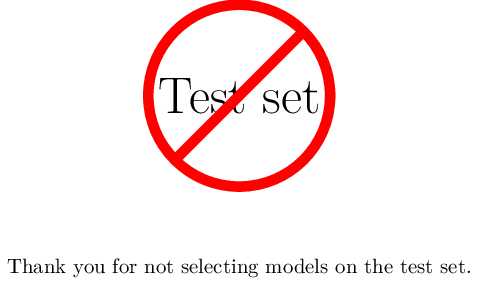

For this we will need to import a function from
[`sklearn`](https://scikit-learn.org/) for the first time. Due to the
broad scope of [`sklearn`](https://scikit-learn.org/), the number of
functions offered by the library is vast. Rather than offering all this
functionality in a single unit, the functions are distributed across a
number of *modules*. The module
[`sklearn.tree`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
contains functions and classes related to building decision trees.

The distinction between training and test tests is made during the model
selection phase. The functionality required during this phase is found
in the module
[`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).
The use the functions and classes offered by
[`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection),
we could import the entire module as we did with
[`pandas`](https://pandas.pydata.org/)

``` python
import sklearn.model_selection as mdlsel
```

After which we can use the functionality using the `mdlsel` prefix. In
practice, however, we will use a limited subset of the functionality
offered by [`sklearn`](https://scikit-learn.org/)’s models. In those
situations, it is customary to import the required functions directly.
During this lab session we require just the
[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
the following code block illustrates how to import it:

In [ ]:
from sklearn.model_selection import train_test_split

**Exercise:** Run the above code cell.

After running the code cell, we are able to call the
[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
without prefixing the (abbreviated) module name.

To use this function we pass it two arguments `iris_X` and `iris_y`.
[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
will assign a random selection of rows to the training set, and the
remainder to the test set. The result is *four values*, a selection from
`iris_X` for the training and test and the corresponding independent
variables taken from `iris_y`

**Exercise:** Run the following code block

In [ ]:
iris_X_tv, iris_X_test, iris_y_tv, iris_y_test = train_test_split(iris_X, iris_y)

The `_tv` suffix indicates that part of the data should be split further
into a training `t` and validation set `v`.

**Exercise:** Use the \[`DataFrame.head`\] method to inspect the first
five rows of the training set. Next, run the cell calling
`train_test_split` once more. Compare the first five rows of this
selection to your previous result. What do you notice? How will this
affect the reproducibility of your results and thus the collaboration
with other data scientists?

In [ ]:
# Your answer here

Many functions in [`sklearn`](https://scikit-learn.org/) work with
random selections. It is important to control for the variability this
entails. Fortunately, the randomness exhibited by computers is not
really random; a computer performs calculations, and the outcomes of
these calculations is fixed. The input of a random number generator is
obtained from a *seed value*. If not provided by the programmer, the
computer will obtain the seed from an unpredictable source (relying on
the physical state of its processor).

The same seed value will result in the same “random pattern.” All we
need to do is fix it in our code. Functions in
[`sklearn`](https://scikit-learn.org/) that rely on randomness have a
parameter named `random_state` that we can assign a number. This fixes
the input to the random number generator and thus we will obtain the
same result every time:

**Exercise:** In the code cell below, adjust the call to
`train_test_split` to set the `random_state` parameter. Inspect the
first five rows of `iris_X_tv`. Rerun the cell and compare the results.
Ask a neighbour to use the same value for `random_state`. How do those
results compare to yours?

In [ ]:
# Your answer here

We will ignore the test data in `iris_X_test` and `iris_y_test` until
the end of this section. For now we wish to use the training data to
select the optimal algorithm and hyperparameter combination. We will
need to further split `iris_X_tv` and `iris_y_tv` into the actual
*training set* and a *validation set*.

**Exercise:** Use `train_test_split` to split the data further into a
training set and a validation set, use the following names

-   `iris_X_tr` for the independent variables in the training set
-   `iris_X_v` for the independent variables in the validation set
-   `iris_y_tr` for the dependent variables in the training set
-   `iris_y_v` for the dependent variables in the validation set

*Hint:* Do not forget about the `random_state` parameter!

In [ ]:
# Your answer here

## 2.4 $k$-nearest neighbours.

There exist many classification algorithms. Many however are restricted
to the domain of two class problems. While it is possible to combine
several binary classification models to make multiclass predictions, we
will instead adopt a procedure that inherently handles this type of
classification problem: $k$-nearest neighbour classification.

$k$-nearest neighbour classification remembers the entire training set.
When given a new observation, it searches the training set for the $k$
observations that are most similar to it. It then assigns the new
observation to the most common class among its $k$ neighbours.

But… what value of $k$ should we choose? This is hard to say in advance.
We need to find the optimal value of $k$ based on the data we have at
hand. But before we get to that, let us first build a classifier for
$k = 1$.

### 2.4.1 Importing [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

`sklearn` offers its implementations in the form of classes. Each
algorithm is represented by its own class. For classification using
$k$-nearest neighbours we need to create an object of the class
[`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier#sklearn.neighbors.KNeighborsClassifier.KNeighborsClassifier).
To do this, we first need to import the class.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Next, we create an object of that type. We can do this by using the
class name as if it were a function. If we wish to change hyperparaters,
we will need to pass the appropriate values to it. The result is an
object of type
[`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier#sklearn.neighbors.KNeighborsClassifier.KNeighborsClassifier).
In order to keep that object around, we assign it to a variable.

**Exercise:** Run the code cell

In [ ]:
one_nn = KNeighborsClassifier(n_neighbors = 1)

Now `one_nn` represents an *untrained model*. It cannot be used yet. To
train it, we need to call its
[`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier#sklearn.neighbors.KNeighborsClassifier.fit)
method.

**Exercise:** Call `one_nn`’s `fit` method to train the model on the
training set.

In [ ]:
# Your answer here

*Congratulations!* You have just trained your first machine learning
model in Python. We will now use that model to make predictions. For
this, trained models in `sklearn` offer a
[`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier#sklearn.neighbors.KNeighborsClassifier.predict)
method.

**Exercise:** Study the documentation for
[`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier#sklearn.neighbors.KNeighborsClassifier.predict).
Explain why this method accepts only one argument

**Exercise:** Use the `predict` method to obtain predictions for the
*training set*. Assign the result to a variable `iris_yhat_tr`. The
`hat` reflects the mathematical notation for predictions, where a
prediction for $y$ is denoted by $\hat{y}$.

In [ ]:
# Your answer here

### 2.4.2 How $k$-NN works

Before we move on, let us pause a moment to study how $k$-NN works.
Nearest neighbour algorithms work by remembering the entire training
set. To make a prediction for a new observation $x_\text{new}$, the
algorithm searches the training set for the $k$ observations that are
most similar to $x_\text{new}$. Next, it determines the most common
class among those $k$ observations and outputs that as its prediction.

**Exercise:** Compare the predictions to the known values `iris_y_tr` by
running the code cell below. Do you notice anything?

In [ ]:
print(iris_y_tr.values)
print(iris_yhat_tr)

In general, comparing all values manually is infeasible. Fortunately,
models offer a method
[`score`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier#sklearn.neighbors.KNeighborsClassifier.score)
that gives us an indication of our model’s performance. Unlike
`predict`, `score` does require two parameters. The first are the
independent variables. These are used to make predictions. The second
parameter should contain the known values for the dependent variable.
This information allows `score` to calculate the accuracy. For
classifiers, the output will be the ratio of correctly predicted
instances.

**Exercise:** Run the code cell below. Can you explain the output?

In [ ]:
one_nn.score(iris_X_tr, iris_y_tr)

### 2.4.3 Similarity and distance

Similarity is often expressed by a distance metric: the further two
observations are apart, the more dissimilar they are. By default the
implementation in [`sklearn`](https://scikit-learn.org/) uses the
Euclidean distance, which is a generalisation of the Pythagorean
theorem:

$$c^2 = \sqrt{a^2 + b^2}$$

To see how this works, we will study the following situation. We wish to
find the distance between two observations $x_1$ and $x_2$ of two
features. $x_1$ has a value of $0$ for both, whereas $x_2$ has values of
$5$ for feature one and $3$ for feature two. The distance between these
two points then is

$$d(x_1, x_2) = \sqrt{5^2 + 3^2} = \sqrt{25 + 9} \approx 5.8$$.

You can visualise $k$-NN by drawing ever larger circles around a new
observation. As soon as the circle grows big enough to encompass $k$
observations, the algorithm stops and returns the most common label

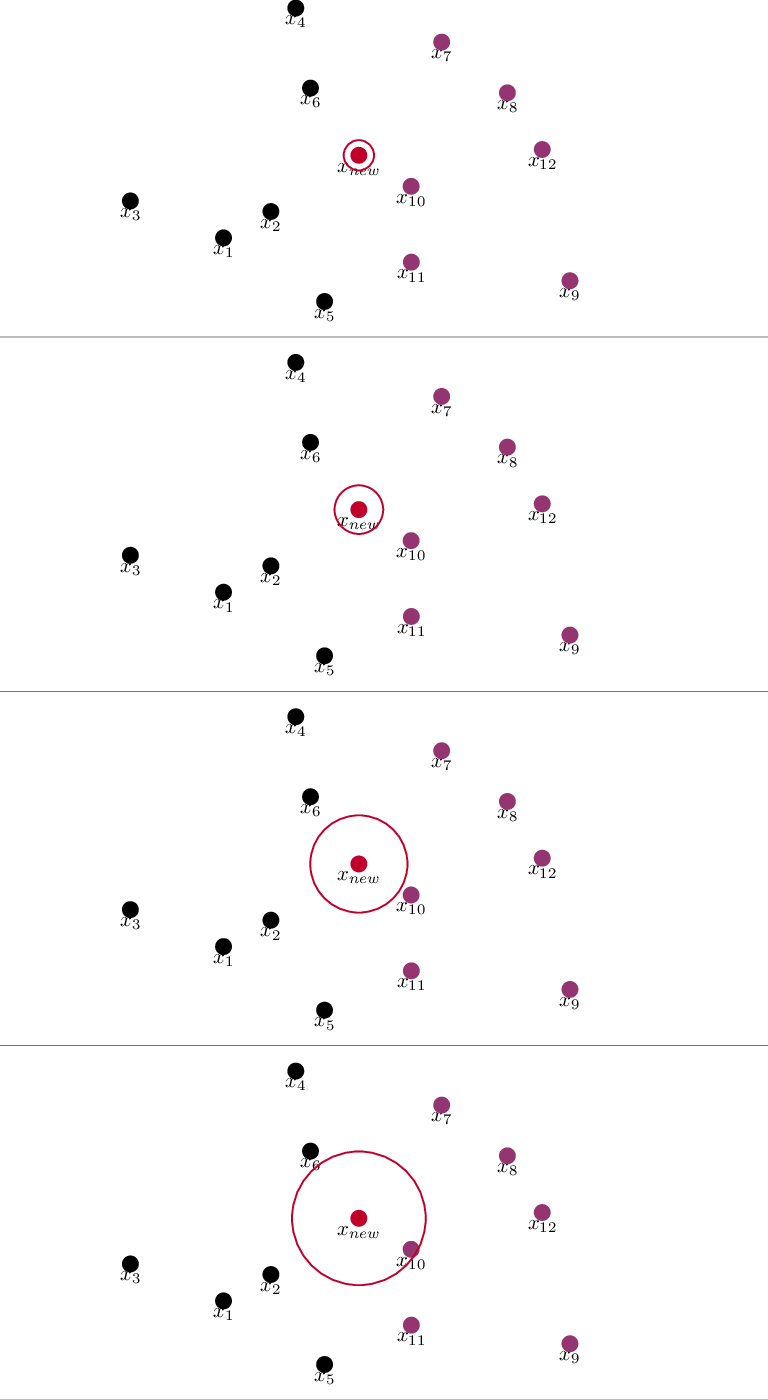

### 2.4.4 In search for $k$

Let us now find the best value for $k$.

**Exercise:** For each value of $k$ in $1, 2, 5, 10, 50$ and $84$ do the
following.

1.  Create a new object of type `KNeighborsClassifier`. Be sure to
    create your model with `n_neighbors` set to the correct value.
    Assign the object to a variable that reflects the number of
    neighbors, such as `knn_2`, `knn_5`.
2.  Train the model on the training set
3.  Calculate the score on the validation set
4.  Write the value for $k$ and the validation score down.

Finally, use the validation scores to determine which value of $k$ to
choose!

In [ ]:
# Your answer here

### 2.4.5 Getting our model ready for production

Having decided on our value for $k$. We wish to estimate its
generalisation performance. We cannot use the training or validation set
for this, as they have been used to select the model. So we will do the
following

1.  Train a new model on `iris_X_tv` and `iris_y_tv` (that is, we now
    combine the training and validation set and use that for training)
2.  Assess it performance on the test set (`iris_X_test` and
    `iris_y_test`)

**Exercise:** For your choice of $k$, estimate the generalisation
performance on the test set. Does the performance on the test set agree
with the results on the validation set.

In [ ]:
# Your answer here

## 2.5 Where to go from here

In this section we searched for a suitable variant of the $k$-nearest
neighbour algorithm by optimising the performance on the validation set.
Having found a value for $k$, we used the totality of test and
validation data to produce a new model. The generalisation performance
of this model was estimated using the test set.

We are now ready to take our model into production. For this, we would
train the model once more on the entire dataset. This way, we use all
information at hand.

*But…* while we carefully selected a value for hyperparameter $k$, we
did not investigate any other algorithms. In practice, we would use the
validation score, not only to tune hyperparameters, but also to select
an algorithm.

# 3 Regression

In this section we will build a regression model. The procedure does not
change much. Regression models are imported and trained in the same way.
That is one of the benefits of using scikit-learn. All algorithms share
a common interface.

There is one thing that classification and regression models cannot
share: their performance measure.

## 3.1 Measuring performance

In the last section we saw that the
[`score`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.score)
method for a classification model returns the accuracy, the ratio of
correctly classified instances. This measure makes no sense for
regression problems. So instead, for this type of problem, the `score`
method returns the *coefficient of determination* or $R^2$ (pronounced
as R squared).

Like accuracy for classification, the maximum value for $R^2$ is $1$.
This value indicates the model correctly predicted the value for all
observations.

An $R^2$ of 0 indicates the model predicted the average value of all
observations. An example, suppose you have a dataset of used car prices.
The average used car price is $\$ 5,000$. A model with an $R^2$ of $0$
scored as good, as a model that would simply output $\$ 5,000$ without
doing any work whatsoever.

It is theoretically possible to obtain a negative $R^2$. This means the
model did worse than always predicting the average. Take our car example
again. A model with a negative $R^2$ could predict high prices (i.e.,
above $\$5,000$) for cheap cars that actually sold for less than
$\$5,000$. For expensive cars, it would predict cheap prices. Regression
models with a negative $R^2$ are best avoided!

## 3.2 Your task

Below is a map of the kingdom of Dadrivendium. It is known for its sharp
cliffs and beautiful meadows. Machilea claims it should be possible to
predict the height above sea level for any point in the country. The
people of Dadrivendium are skeptical of his claims. They demand proof.

A year has passed and Machilea has made a map of Dadrivendium using an
altimeter, recording the $x$ and $y$ coordinates and the height at a
$1000$ places. The first few measurements can be seen below. He claims
he has done the hard work and now asks you to do the last small thing:
building a predictive model.

| x       | y       | height  |
|:--------|:--------|:--------|
| $22.7$  | $-18.9$ | $-0.02$ |
| $25.3$  | $27.0$  | $0.31$  |
| $22.5$  | $-23.1$ | $0.38$  |
| $-18.4$ | $-9.5$  | $4.43$  |

## 3.3 Let’s get to work!

Using a series of measurements of the country’s height above sea level
for various $x$ and $y$ coordinates in the kingdom, build a predictive
model that can generalise.

The data is found in the file `dadrivendium.csv`.

**Exercise:** Load the data into a DataFrame `df_dadr`.

In [ ]:
# Your answer here

**Exercise:** Split the data into a training, validation and test set

In [ ]:
# Your answer here

In the next exercise you will be asked to try out various hyperparameter
values. A straightforward approach would be to create a separate code
cell for each value, but that would result in a large number of near
identical cells. This is not only a waste of time, but error-prone as
well. The situation is illustrated below:

``` python
nn1 = KNeighborsClassifier(n_neighbors = 1)
nn1.fit(iris_X_tr, iris_y_tr)
nn1.score(iris_X_v, iris_y_v)
```

``` python
nn3 = KNeighborsClassifier(n_neighbors = 3)
nn3.fit(iris_X_tr, iris_y_tr)
nn3.score(iris_X_v, iris_y_v)
```

``` python
nn5 = KNeighborsClassifier(n_neighbors = 5)
nn5.fit(iris_X_tr, iris_y_tr)
nn5.score(iris_X_v, iris_y_v)
```

Observe that the only difference between the code cells is the value
passed to `n_neighbors`. Let us capture those in a list:

In [ ]:
ks = [1, 3, 5]

Now, we can instruct Python to repeat the same code **for** every
element in the list:

In [ ]:
for k in ks:
    print('Inside the for-loop')
    print(k)
    
print('Outside the for-loop')

**Exercise:** Analyse the code cell above. What output do you expect.
Run the cell. Does the result match your expectation?

You can “nest” for-loops. For instance, the behaviour of
[`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier)
and
[`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor)
can be controlled via the `weights` parameter. If we want try out
several combinations of both `n_neighbors` and `weights` we could
combine two loops:

In [ ]:
for k in ks:
    for w in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors = k, weights = w)
        knn.fit(iris_X_tr, iris_y_tr);
        print(k, w, knn.score(iris_X_v, iris_y_v))

**Exercise:** Estimate the generalisation performance of each of the
following combinations of algorithm and hyperparameters. Which
combination would you pick? Which combination seems the worst?

| Algorithm                                                                                                        | Hyperparameters                 |
|:-----------------------------------------------------------------------------------------------------------------|:--------------------------------|
| [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression)    | None                            |
| [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor)  | `max_depth`, `min_samples_leaf` |
| [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor) | `n_neighbors`                   |

In [ ]:
# Your answer here

**Exercise:** Train your best candidate on the entire dataset. Assign
the result to `the_model`.

In [ ]:
# Your answer here

**Exercise:** Run the code cell below. **You do not have to understand
this code**. The result should your models predicted map of the kingdom!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(-30, 30, 100)
ys = np.linspace(-30, 30, 100)
xv, yv = np.meshgrid(xs, ys)
zv = the_model.predict(np.column_stack((xv.ravel(), yv.ravel()))).reshape(xv.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
ax.plot_surface(xv, yv, zv, cmap='terrain')
# Set the camera to a predetermined position
ax.view_init(elev=40, azim=137)
# Make background black
ax.set_facecolor((0, 0, 0))
plt.axis('off');

**Exercise:** Repeat the previous two exercises with the worst
performing model.

In [ ]:
# Your answer here

**Exercise:** You may have investigated the models built by two
different algorithms. That leaves a third category of models to
investigate. Feel free to try out how the best model from that category
predicts the kingdom looks.

In [ ]:
# Your answer here

# 4 Homework

## 4.1 Finish the lab exercises

Finish the exercises from this lab session

# 5 Bibliography

Dua, Dheeru, and Casey Graff. 2017. “UCI Machine Learning Repository.”
University of California, Irvine, School of Information; Computer
Sciences. <http://archive.ics.uci.edu/ml>.

Fisher, R. A. 1936. “The Use of Multiple Measurements in Taxonomic
Problems.” *Annals of Eugenics* 7 (2): 179–88.
https://doi.org/<https://doi.org/10.1111/j.1469-1809.1936.tb02137.x>.

Stevens, S. S. 1946. “On the Theory of Scales of Measurement.” *Science*
103 (2684): 677–80. <https://www.jstor.org/stable/1671815>.